In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [2]:
# Load the iris dataset
iris_df = pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.shape

(150, 6)

In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It can be observed that all the features have different means and standard deviations.

In [5]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

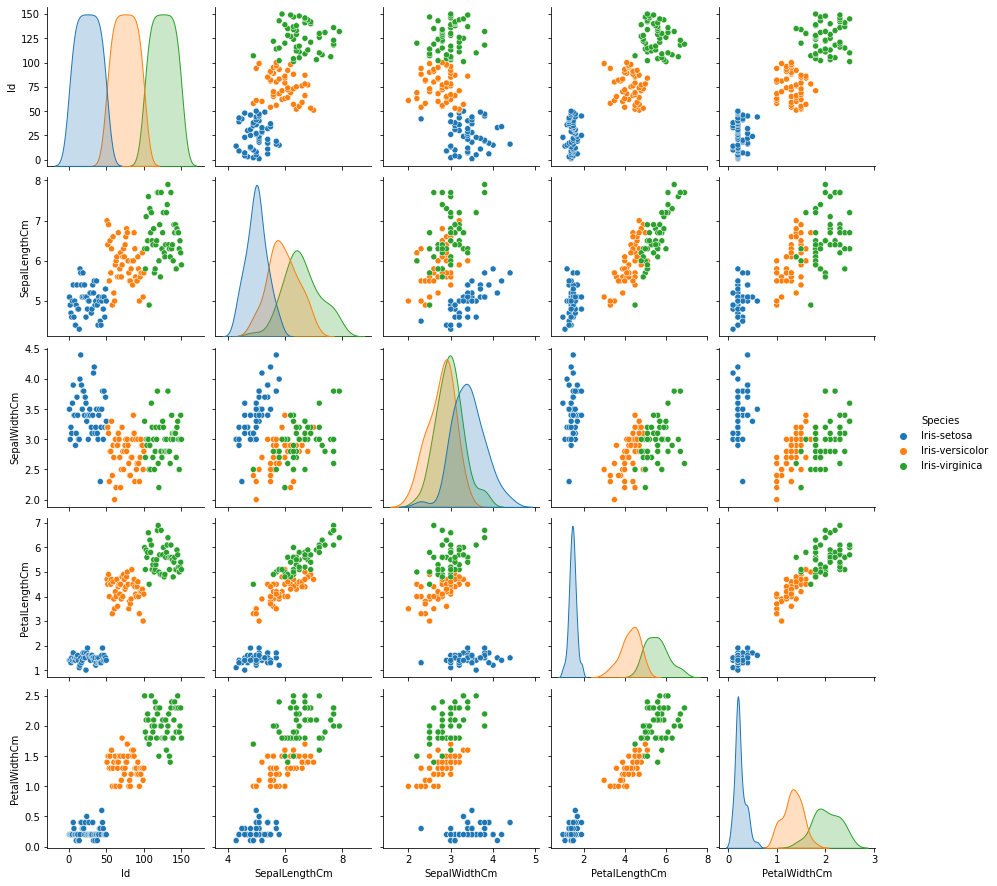

In [6]:
sb.pairplot(iris_df,hue='Species')

<AxesSubplot:>

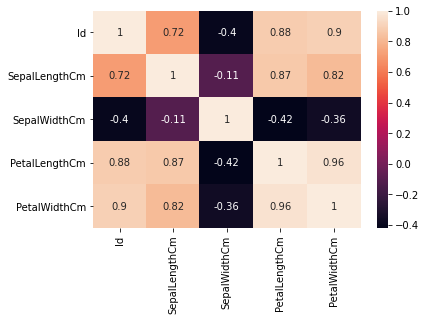

In [7]:
corr = iris_df.corr(method ='pearson')
sb.heatmap(corr, annot = True)

## Label Encoding

In [8]:
LE = LabelEncoder()

iris_df_LE = iris_df 
iris_df_LE.Species = LE.fit_transform(iris_df_LE.Species)

for col in iris_df_LE.columns:
    print(col,':',len(iris_df_LE[col].unique()),'labels')

Id : 150 labels
SepalLengthCm : 35 labels
SepalWidthCm : 23 labels
PetalLengthCm : 43 labels
PetalWidthCm : 22 labels
Species : 3 labels


## SPLITTING DATA
1. The independent features :- SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
2. The dependent feature :-the species of flower.

In [9]:
# Independent variables 
X=iris_df.iloc[:,1:5]

# Dependent variable
Y=iris_df['Species']

print(X.shape,Y.shape)

(150, 4) (150,)


In [10]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## SPLITTING INTO TEST & TRAIN


In [11]:
# Spliting in TEST & TRAIN
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

In [12]:
# For checking the distribution in the training dataset
y_train=pd.Series(y_train)
y_train.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Species, dtype: float64

## TRAINING MODEL

In [13]:
dtree_clf=DecisionTreeClassifier(criterion = "entropy")
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## VISUALIZING TREE

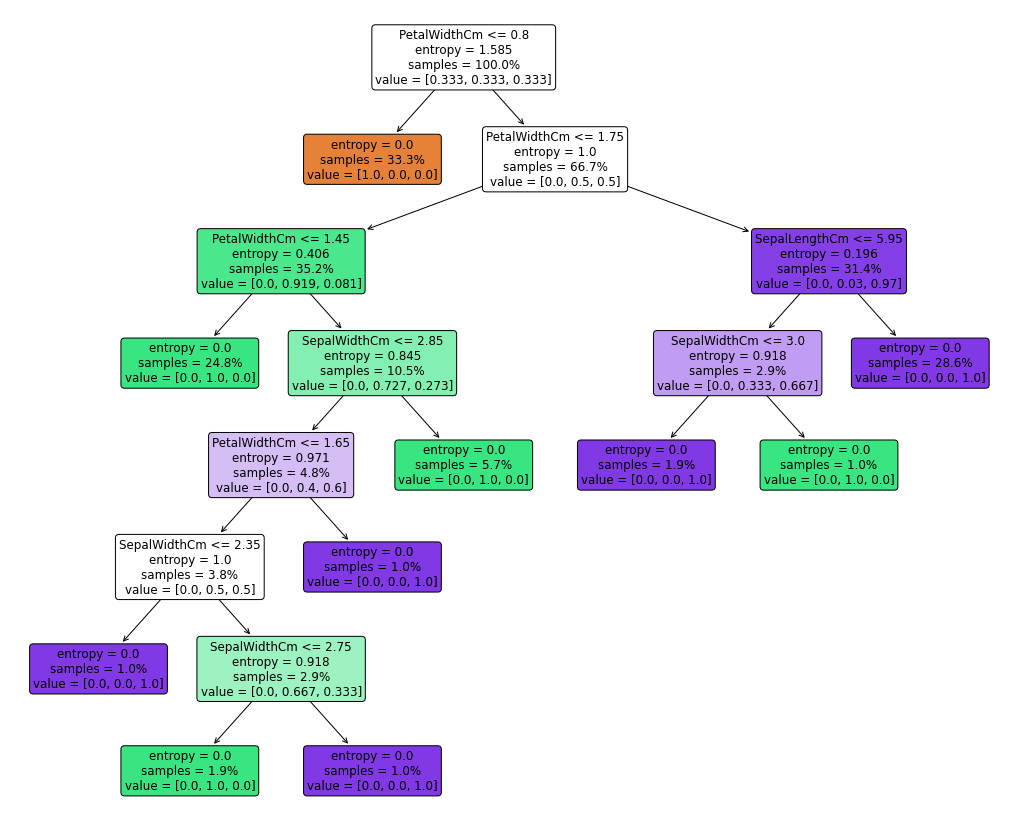

In [14]:

cols=list(X.columns.values)
plt.figure(figsize=(18,15))
tree.plot_tree(dtree_clf,feature_names=cols,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

The Descision Tree Classifier is created and is visaulized graphically. 

## PREDICTING

In [15]:
y_pred=dtree_clf.predict(x_test)

In [16]:
#Checking Misclassification
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]], dtype=int64)

From confusion matrix, it can be observed that there is 1 misclassification.

In [17]:
dtree_clf.score(x_test,y_test)

0.9111111111111111

The accuracy score in case of testing it is 93.33%.

## INFERENCE
Model was built as per the probem statement and the accuracy score of the model is 93.33%. with the testing data.